***

Data visualization for Students
===
***


In [85]:

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import geopandas as gpd
import geoplot as gplt
import folium
from geopy.geocoders import Nominatim
import math
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error, confusion_matrix, accuracy_score
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier

In [86]:
data = pd.read_csv("Students_data.csv")

#### Bar plot for Students Class Distrubtion

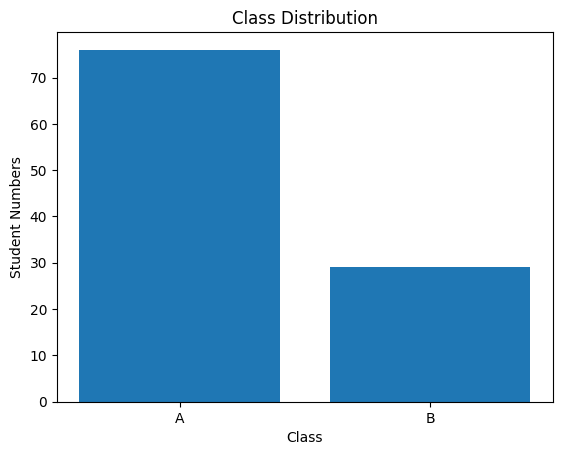

In [87]:
class_counts = data['class'].value_counts()
plt.bar(class_counts.index, class_counts.values)
plt.xlabel('Class')
plt.ylabel('Student Numbers')
plt.title('Class Distribution')
plt.show()


#### Pie Chart for Students Gender

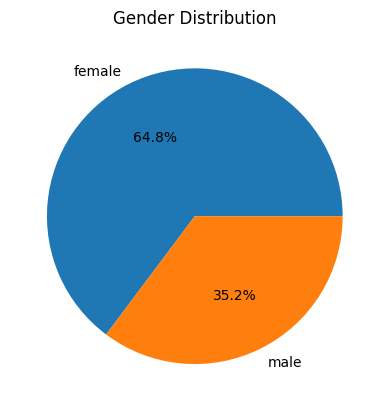

In [88]:
gender_counts = data["gender"].value_counts()
plt.pie(gender_counts, labels=gender_counts.index, autopct='%.1f%%')
plt.title('Gender Distribution')
plt.show()


#### Histogram for Students' GPA Frequency

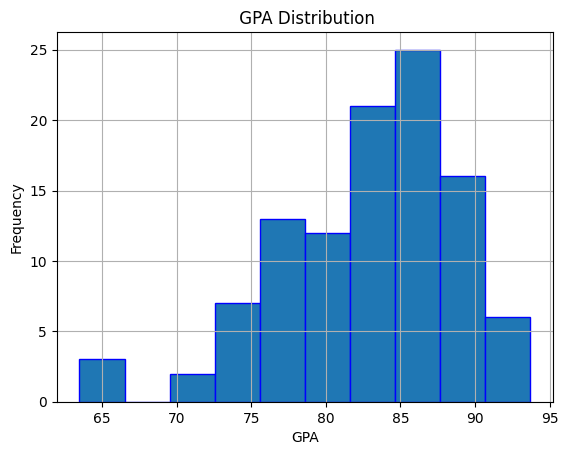

In [89]:

plt.hist(data["GPA"],bins=10 , edgecolor='blue')
plt.xlabel("GPA")
plt.ylabel("Frequency")
plt.title(" GPA Distribution")
plt.grid(True)
plt.show()


#### Histogram for Students' Algebra Grades Frequency

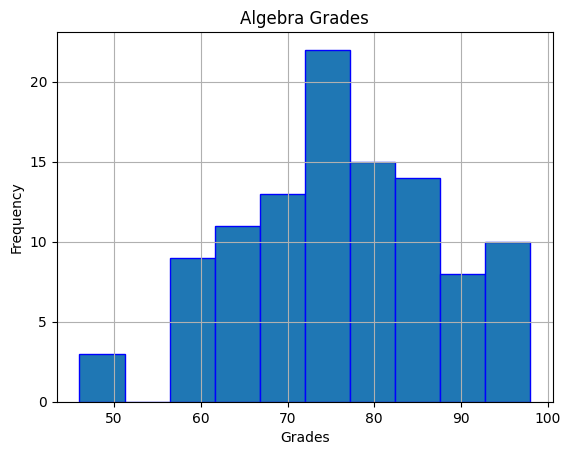

In [90]:

plt.hist(data["Algebra"],bins=10 , edgecolor='blue')
plt.xlabel("Grades")
plt.ylabel("Frequency")
plt.title("Algebra Grades")
plt.grid(True)  
plt.show()


#### Histogram for Students' Calculus1 Grades Frequency

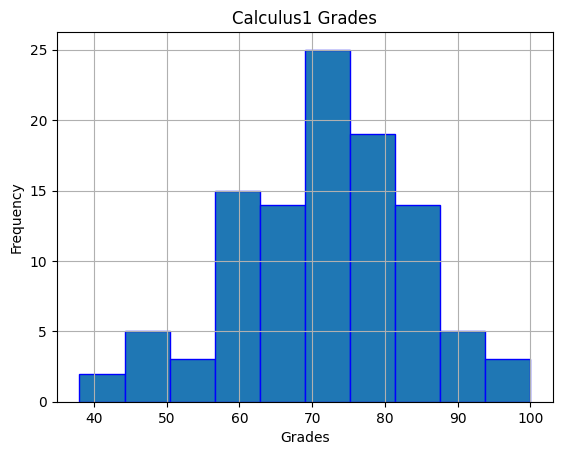

In [91]:

plt.hist(data["Calculus1"],bins=10 , edgecolor='blue')
plt.xlabel("Grades")
plt.ylabel("Frequency")
plt.title("Calculus1 Grades")
plt.grid(True)  
plt.show()


#### Histogram for Students' Calculus2 Grades Frequency

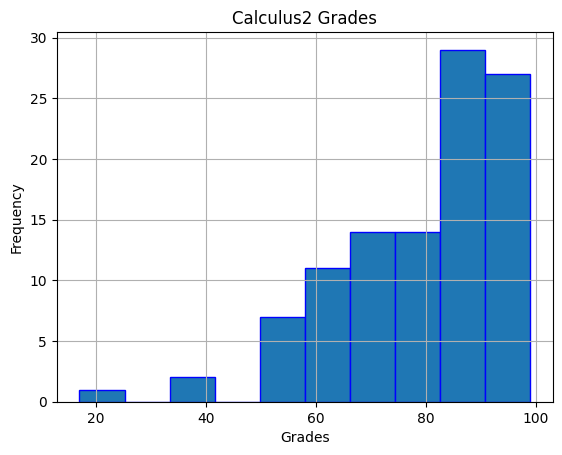

In [92]:

plt.hist(data["Calculus2"],bins=10 , edgecolor='blue')
plt.xlabel("Grades")
plt.ylabel("Frequency")
plt.title("Calculus2 Grades")
plt.grid(True)  
plt.show()


#### Histogram for Students' Statistics Grades Frequency

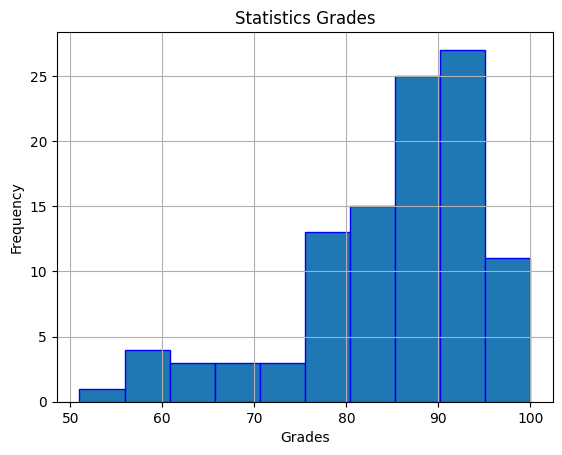

In [93]:

plt.hist(data["Statistics"],bins=10 , edgecolor='blue')
plt.xlabel("Grades")
plt.ylabel("Frequency")
plt.title("Statistics Grades")
plt.grid(True)  
plt.show()


#### Histogram for Students' Probability Grades Frequency

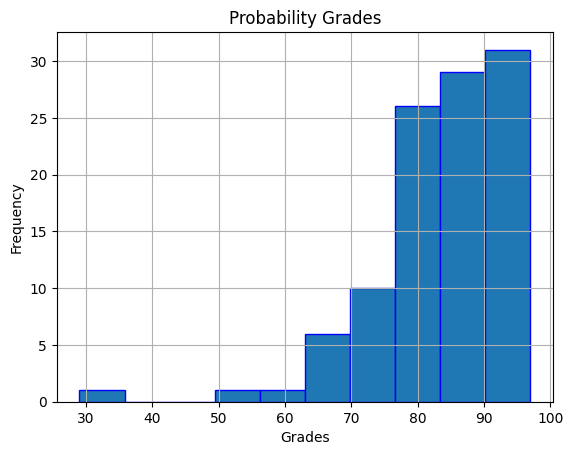

In [94]:

plt.hist(data["Probability"],bins=10 , edgecolor='blue')
plt.xlabel("Grades")
plt.ylabel("Frequency")
plt.title("Probability Grades")
plt.grid(True)  
plt.show()


#### Histogram for Students' Measure Grades Frequency

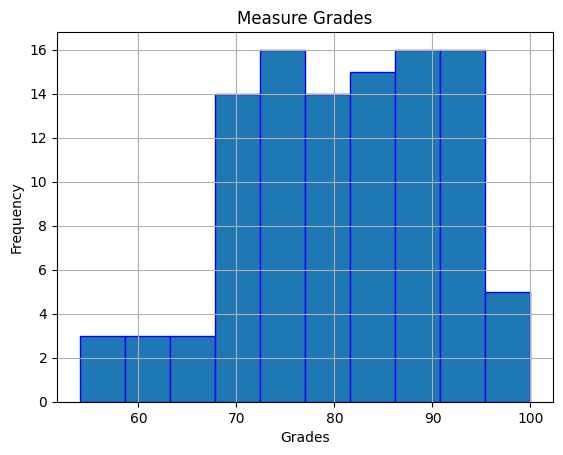

In [95]:

plt.hist(data["Measure"],bins=10 , edgecolor='blue')
plt.xlabel("Grades")
plt.ylabel("Frequency")
plt.title("Measure Grades")
plt.grid(True)  
plt.show()


#### Histogram for Students' Functional Analysis Grades Frequency

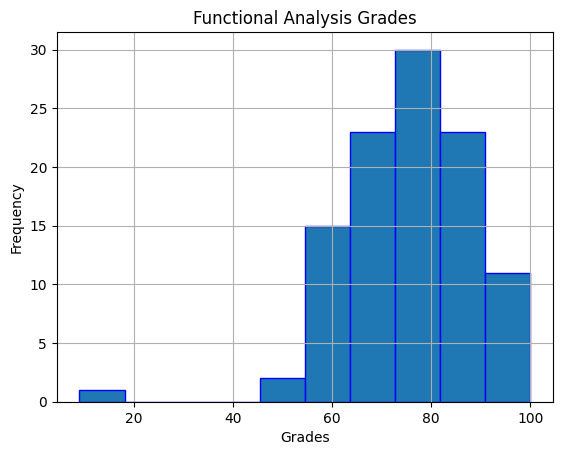

In [96]:

plt.hist(data["Functional_analysis"],bins=10 , edgecolor='blue')
plt.xlabel("Grades")
plt.ylabel("Frequency")
plt.title("Functional Analysis Grades")
plt.grid(True)  
plt.show()



#### From1 refers to Students location.


In [97]:

locations = {
    "A": "Abu Dhabi",
    "B": "Baghdad",
    "C": "Cairo",
    "D": "دمنهور",
    "E": "Erbil",
    "F": "Faisalabad",
    "G": "Gaza City",
    "H": "Huston",
    "I": "Isfahan",
    "J": "Jeddah",
    "K": "Karachi",
    "L": "Luxor",
    "M": "المحلة الكبرى",
    "N": "المنيا",
    "O": "Oman",
    "P": "Petra",
    "Q": "Qom",
    "R": "Riyadh",
    "S": "Sanaa",
    "T": "Tehran",
    "U": "Umm Qais",
    "V": "Valiasr",
    "W": "Wadi Rum",
    "X": "Xanthos",
    "Y": "Yazd",
    "Z": "Zahedan",
    "a": "Amsterdam",
    "b": "Berlin",
    "c": "Cape Town",
    "d": "Dublin",
    "e": "Eindhoven",
    "f": "Fukuoka",
    "g": "Geneva",
    "h": "شبرا الخيمة",
    "i": "Istanbul",
    "j": "Jerusalem",
    "k": "Kyoto",
    "l": "Lisbon",
    "m": "Marrakech",
    "n": "Nairobi",
    "o": "Oslo",
    "p": "Prague",
    "q": "Quebec City",
    "r": "Reykjavik",
    "s": "Seville",
    "t": "Tunis",
    "u": "Utrecht",
    "v": "Vienna",
    "w": "Wellington",
    "x": "Xi'an",
    "y": "Yerevan",
    "z": "Zurich"
}

geolocator = Nominatim(user_agent="from1")

coordinates = {}
for location, address in locations.items():
    location_coords = geolocator.geocode(address)
    if location_coords:
        coordinates[location] = location_coords
    else:
        print(f"Failed to geocode location: {location}")

map_center = [0, 0]
if coordinates:
    map_center = [sum(coord.latitude for coord in coordinates.values()) / len(coordinates),
                  sum(coord.longitude for coord in coordinates.values()) / len(coordinates)]

map_obj = folium.Map(location=map_center, zoom_start=4)

for index, row in data.iterrows():
    location_name = row['from1']
    location_coords = coordinates.get(location_name)
    if location_coords:
        folium.Marker(location=[location_coords.latitude, location_coords.longitude], popup=location_name).add_to(map_obj)

map_obj



### From2: a probably bad indicator for preference on mathematics


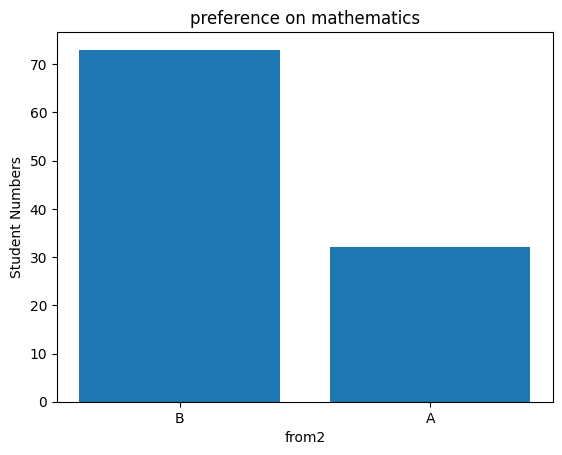

In [98]:

class_counts = data['from2'].value_counts()
plt.bar(class_counts.index, class_counts.values)
plt.xlabel('from2')
plt.ylabel('Student Numbers')
plt.title('preference on mathematics')
plt.show()



### From4: a probably bad indicator for family background. 0 with more wealth, 4 with more poverty


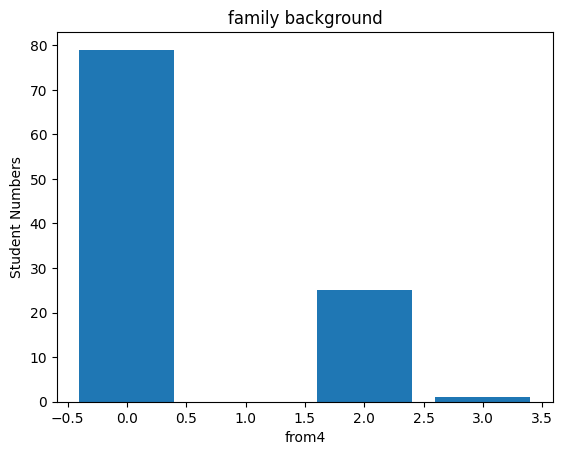

In [99]:

class_counts = data['from4'].value_counts()
plt.bar(class_counts.index, class_counts.values)
plt.xlabel('from4')
plt.ylabel('Student Numbers')
plt.title('family background')
plt.show()



#### The final indicator y:
#### 0, one fails to apply for the graduate school, who may apply again or search jobs in the future
#### 1, success, inland
#### 2, success, abroad


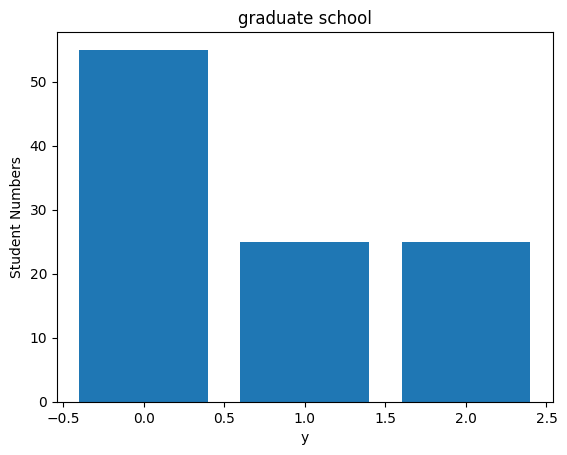

In [100]:

class_counts = data['y'].value_counts()
plt.bar(class_counts.index, class_counts.values)
plt.xlabel('y')
plt.ylabel('Student Numbers')
plt.title('graduate school')
plt.show()

***

Data Analysis
===
***


In [101]:
average_gpa_all_students = data['GPA'].mean()
print("Average GPA of all students:", average_gpa_all_students)
μ = average_gpa_all_students

Average GPA of all students: 82.95704761904761



checking the effect of from1 (home location) on the students GPA


In [102]:

average_gpa_by_category = data.groupby("from1")["GPA"].agg(['mean', 'std', 'size'])
average_gpa_by_category.columns = ['Average GPA', 'Standard Deviation', 'Number of Entries']
average_gpa_by_category_sorted = average_gpa_by_category.sort_values(by='Number of Entries', ascending=False)
print(average_gpa_by_category_sorted)

       Average GPA  Standard Deviation  Number of Entries
from1                                                    
B        82.565556            5.376779                  9
E        82.941111            6.202666                  9
P        83.386250            5.151829                  8
X        84.370000            3.363936                  7
K        85.078333            5.791626                  6
M        85.360000            7.041907                  5
N        82.996000            4.367205                  5
J        83.600000            4.032675                  4
U        85.897500            2.182573                  4
S        85.332500            4.820590                  4
A        83.800000            7.231012                  4
F        77.910000            8.788758                  4
H        73.127500            5.685106                  4
I        77.610000            1.904022                  3
T        77.636667           12.922393                  3
O        81.39


Null Hypothesis: the average GPA of the students with near-home locations (B) is more than or equal to the average GPA μ ≥ 82.957047

Alternative Hypothesis: the near-home students have a GPA lower than the average GPA  μ < 82.957047

Level of significance: 𝛼 = 0.025 , degree_of_freedom = 8  --> t =  -2.306

Decision: Since t = -0.2184343079750918 is greater than -1.645, The test statistic falls in the nonrejection region, so 𝐻𝑜 is not rejected.

At the 2.5% level of significance, there is not enough evidence to reject the claim that
the average GPA of near-home location students is more than or equal to the average one (82.957047)


In [103]:

x = 82.565556
s = 5.376779
N = 9
t = (x - μ) / (s / math.sqrt(N))
print("t-score:", t)

t-score: -0.21843465337571813



checking the effect of form2 (preferring maths) on the students GPA


In [104]:

average_gpa_by_category = data.groupby("from2")["GPA"].agg(['mean', 'std', 'size'])
average_gpa_by_category.columns = ['Average GPA', 'Standard Deviation', 'Number of Entries']
average_gpa_by_category_sorted = average_gpa_by_category.sort_values(by='Average GPA', ascending=False)
print(average_gpa_by_category_sorted)

       Average GPA  Standard Deviation  Number of Entries
from2                                                    
B        83.367534            6.322354                 73
A        82.020625            5.365105                 32



Null Hypothesis: the average GPA of the students who don't prefer mathematics is less than or equal to the average GPA μ ≤ 82.957047

Alternative Hypothesis: the students who don't prefer maths have a GPA higher than the average GPA  μ > 82.957047

level of significance: α = 0.05  -->  Z = 1.645  

Decision: Since Z = 0.5547304794075413 is less than 1.645, The test statistic falls in the nonrejection region, so 𝐻𝑜 is not rejected.

At the 5% level of significance, there is not enough evidence to reject the claim that
the average GPA of students who don't prefer mathematics is more than or equal to the average ones (82.957047)


In [105]:

x = 83.367534
σ = 6.322354 
N = 73
Z = (x - μ) / (σ / math.sqrt(N))
print("Z-score:", Z)

Z-score: 0.5547296428290911



checking the effect of form3 (students application) on the students GPA

In [106]:

average_gpa_by_category = data.groupby("from3")["GPA"].agg(['mean', 'std', 'size'])
average_gpa_by_category.columns = ['Average GPA', 'Standard Deviation', 'Number of Entries']
average_gpa_by_category_sorted = average_gpa_by_category.sort_values(by='Average GPA', ascending=False)
print(average_gpa_by_category_sorted)

       Average GPA  Standard Deviation  Number of Entries
from3                                                    
S        89.490000            3.328231                  6
A        83.543333            5.144532                 81
B        81.150000            4.716616                  4
D        79.816000            6.982828                 10
C        70.945000            7.294073                  4



Null Hypothesis: the average GPA of the students category A is less than or equal to the average GPA μ ≤ 82.

Alternative Hypothesis: the students of category A have a GPA higher than the average GPA  μ > 82.957047
level of significance: α ≤ 0.05  -->  Z = -1.645  

Decision: Since Z = 0.18465268348992786 is greater than -1.645, The test statistic falls in the nonrejection region, so 𝐻𝑜 is not rejected.

At the 5% level of significance, there is not enough evidence to reject the claim that
the average GPA of rich students is more than or equal to the average ones (82.957047)


In [107]:

x = 83.543333
σ = 5.144532
N = 81
Z = (x - μ) / (σ / math.sqrt(N))
print("Z-score:", Z)

Z-score: 1.0256653916374723



checking the effect of form4 (family wealth) on the students GPA


In [108]:

average_gpa_by_category = data.groupby("from4")["GPA"].agg(['mean', 'std', 'size'])
average_gpa_by_category.columns = ['Average GPA', 'Standard Deviation', 'Number of Entries']
average_gpa_by_category_sorted = average_gpa_by_category.sort_values(by='Average GPA', ascending=False)
print(average_gpa_by_category_sorted)

       Average GPA  Standard Deviation  Number of Entries
from4                                                    
0        83.082532            6.040178                 79
2        82.940000            6.033530                 25
3        73.470000                 NaN                  1



Null Hypothesis: the average GPA of the rich students is more than or equal to the average GPA μ ≥ 82.957047

Alternative Hypothesis: the rich students have a GPA lower than the average GPA  μ < 82.957047

level of significance: α ≤ 0.05  -->  Z = -1.645  

Decision: Since Z = 0.18465268348992786 is greater than -1.645, The test statistic falls in the nonrejection region, so 𝐻𝑜 is not rejected.

At the 5% level of significance, there is not enough evidence to reject the claim that
the average GPA of rich students is more than or equal to the average ones (82.957047)


In [109]:

x = 83.082532
σ = 6.040178
N = 79
Z = (x - μ) / (σ / math.sqrt(N))
print("Z-score:", Z)

Z-score: 0.18465177255393828


***

Data Regression
===
***

# Predicting y Column Using Logistic Regression

### Step 2: Loading and Encoding Data

In [110]:

data = pd.read_csv('Students_data.csv')

labelencoder = LabelEncoder()
for feature in ['from1', 'from2', 'from3', 'from4']:
    data[feature] = labelencoder.fit_transform(data[feature])

### Step 3: Choosing Features and Target Variable

In [111]:

# Choosing features and target variable
features = ['from1', 'from2', 'from3', 'from4']
X = data[features]
y = data['y']

### Step 4: Normalizing the Data

In [112]:

# Normalizing the data
scaler = MinMaxScaler()
X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

### Step 5: Splitting Data into Training and Testing Sets

In [113]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)


### Step 6: Training a Logistic Regression Model

In [114]:

# Instantiating the model
logReg = LogisticRegression()

# Fitting the model
logReg.fit(X_train, y_train)


LogisticRegression()

#### Step 7: Making Predictions and Calculating Accuracy and Mean Squared Error

In [115]:

# Making predictions
y_pred = logReg.predict(X_test)

# Calculating accuracy
accuracy = metrics.accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy*100}%')

# Calculating Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')


Accuracy: 66.66666666666666%
Mean Squared Error: 0.9047619047619048



#### Step 8: Plotting Actual and Predicted Observations for Each Feature


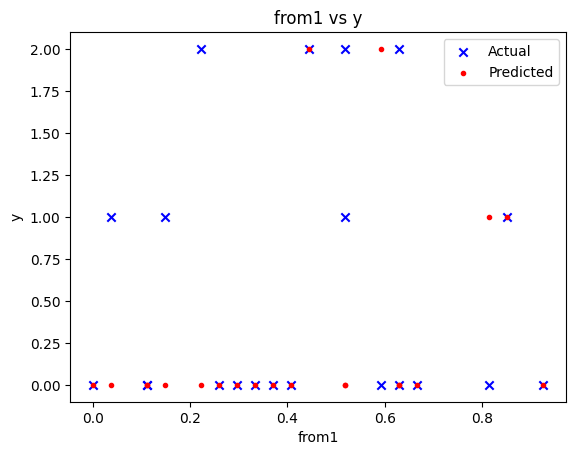

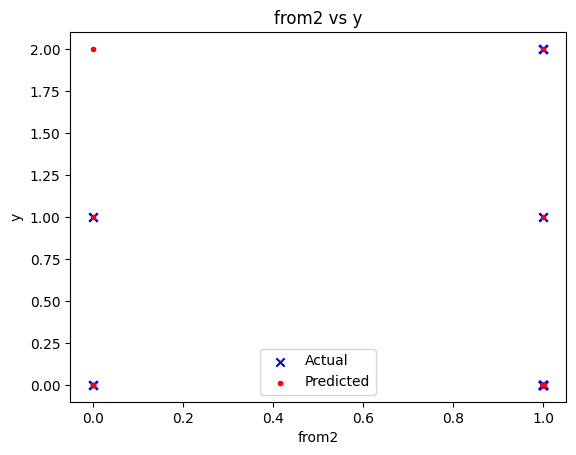

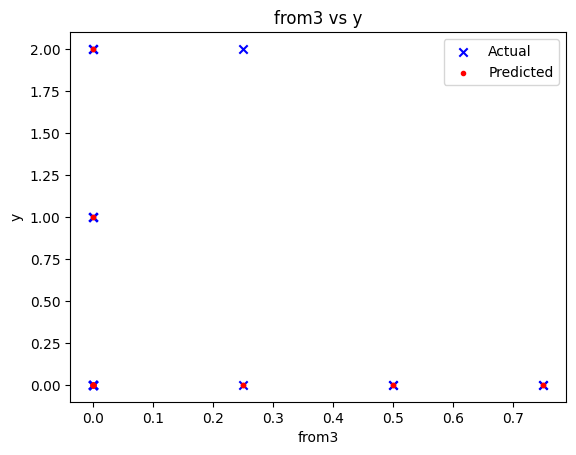

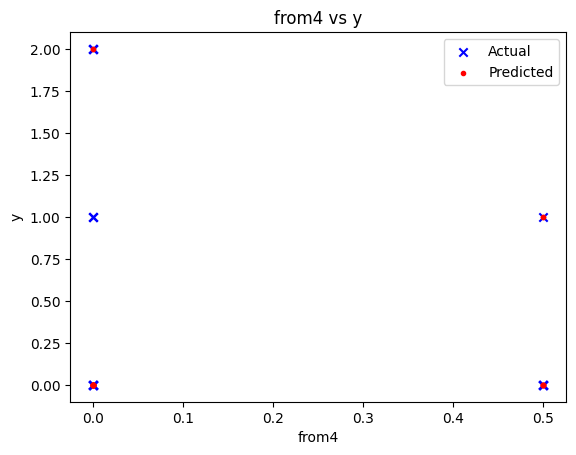

In [133]:

# Plotting results
for feature in features:
    fig, ax = plt.subplots()
    ax.scatter(X_test[feature], y_test, color='blue', marker='x', label='Actual')
    ax.scatter(X_test[feature], y_pred, color='red',marker='.', label='Predicted')
    ax.set_title(f'{feature} vs y')
    ax.set_xlabel(feature)
    ax.set_ylabel('y')
    ax.legend()
    plt.show()

***

Data Classification
===
***

In [117]:
# Create KNN Classifier
knn = KNeighborsClassifier(n_neighbors=5)

# Train the model using the training sets
knn.fit(X_train, y_train)

# Predict the response for test dataset
y_pred = knn.predict(X_test)

# Model Accuracy
print("Accuracy:", accuracy_score(y_test, y_pred))

# Confusion Matrix
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.6190476190476191
Confusion Matrix:
 [[11  1  1]
 [ 3  1  0]
 [ 3  0  1]]
